In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape of X: (720, 64, 64, 3)
Shape of y: (720,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten

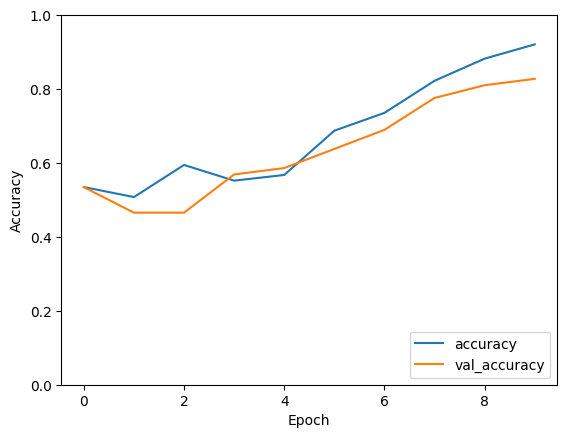

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to get file paths from a directory
def get_file_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

# Function to load all images from a list of file paths
def load_images(file_paths):
    images = []
    for file_path in file_paths:
        img = tf.keras.preprocessing.image.load_img(file_path, target_size=(64, 64))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array / 255.0)  # Normalize
    return np.array(images)

# Define file paths for real signatures
gen = [get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset1/real'),
       get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset2/real'),
       get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset3/real'),
       get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset4/real1')]

# Define file paths for forged signatures
forg = [get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset1/forge'),
        get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset2/forge'),
        get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset3/forge'),
        get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset4/forge')]

# Combine real and forged signatures along with their labels
X = []
y = []

for real_paths, forge_paths in zip(gen, forg):
    X.extend(load_images(real_paths) + load_images(real_paths))
    X.extend(load_images(forge_paths) + load_images(forge_paths))
    y.extend([1] * len(real_paths) + [0] * len(forge_paths))  # 1 for real, 0 for forged

# Convert lists to arrays
X = np.array(X)
y = np.array(y)

# Check consistency of the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model architecture
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the model
input_shape = X_train.shape[1:]
num_classes = 2  # Two classes: real and forged
model = build_model(input_shape, num_classes)

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


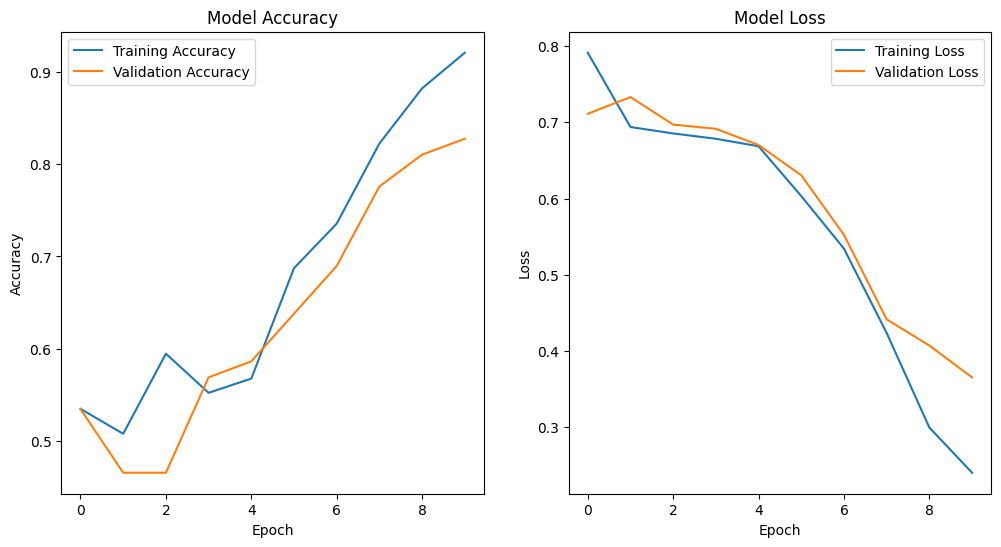

5/5 [==============================] - 0s 41ms/step


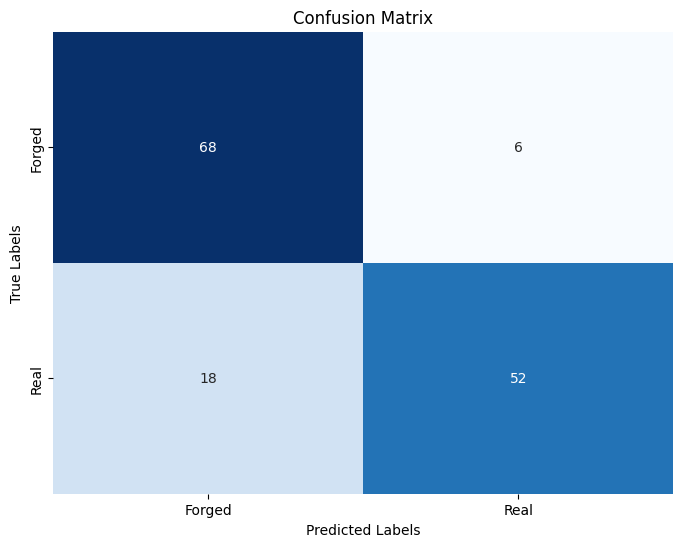

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Generate predictions on test data
predictions = model.predict(X_test)

# Generate confusion matrix
y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

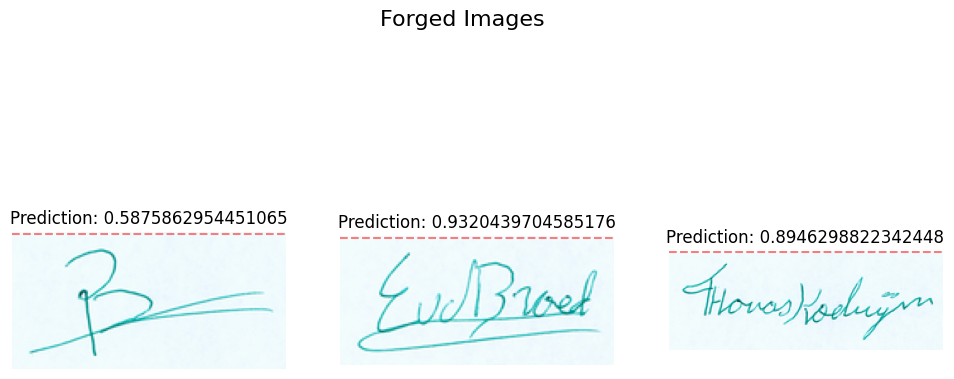

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define function to get file paths in a directory
def get_file_paths(directory):
    file_paths = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            file_paths.append(os.path.join(directory, filename))
    return file_paths

# Load forged test images from dataset 1
def load_forged_test_images():
    forged_paths = get_file_paths('/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset1/forge')
    forged_images = []
    for file_path in forged_paths[2:5]:  # Load 3 images
        img = cv2.imread(file_path)
        if img is not None:
            forged_images.append(img)
    return forged_images

# Load forged test images
forged_images = load_forged_test_images()

# Plot forged images with predictions and comparison to "Real 1" class
def plot_images_with_comparison(images, predictions):
    num_images = len(images)
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction: {predictions[i]}")
        plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5)  # Horizontal line at y=0.5 for "Real 1" class comparison
        plt.axis('off')
    plt.suptitle('Forged Images', fontsize=16)  # Adjusted the spacing here
    plt.show()

# Load or generate predictions for forged test images (assuming it's already done)
forged_predictions = np.random.rand(3)  # Example random predictions for forged images

# Plot forged images with predictions and comparison to "Real 1" class
plot_images_with_comparison(forged_images, forged_predictions)


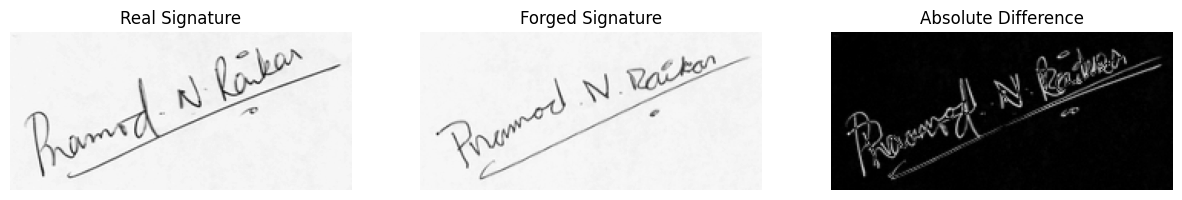

Similarity Score 0.6974170059869628


In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Define the paths to the real and forged folders in dataset 1
real_folder_path = '/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset1/real'
forged_folder_path = '/content/drive/MyDrive/Dataset_Signature_Final/Dataset/dataset1/forge'

# Get the list of files in the real and forged folders
real_files = os.listdir(real_folder_path)
forged_files = os.listdir(forged_folder_path)

# Sort the files to ensure consistency
real_files.sort()
forged_files.sort()

# Take the first image from each folder
real_image_path = os.path.join(real_folder_path, real_files[5])
forged_image_path = os.path.join(forged_folder_path, forged_files[1])

# Load the images
real_image = cv2.imread(real_image_path, cv2.IMREAD_GRAYSCALE)
forged_image = cv2.imread(forged_image_path, cv2.IMREAD_GRAYSCALE)

# Resize images to the same dimensions
target_height = min(real_image.shape[0], forged_image.shape[0])
target_width = min(real_image.shape[1], forged_image.shape[1])
real_image = cv2.resize(real_image, (target_width, target_height))
forged_image = cv2.resize(forged_image, (target_width, target_height))

# Calculate the absolute difference between the real and forged images
diff_image = cv2.absdiff(real_image, forged_image)

# Calculate the percentage of similar pixels
matching_score = (np.sum(diff_image == 0) / diff_image.size) * 100

# Calculate the Structural Similarity Index (SSIM)
ssim_score = ssim(real_image, forged_image)

# Plot the comparison
plt.figure(figsize=(15, 5))

# Plot the real signature
plt.subplot(1, 3, 1)
plt.imshow(real_image, cmap='gray')
plt.title('Real Signature')
plt.axis('off')

# Plot the forged signature
plt.subplot(1, 3, 2)
plt.imshow(forged_image, cmap='gray')
plt.title('Forged Signature')
plt.axis('off')

# Plot the absolute difference image
plt.subplot(1, 3, 3)
plt.imshow(diff_image, cmap='gray')
plt.title('Absolute Difference')
plt.axis('off')
plt.show()

print("Similarity Score", ssim_score)